### This script consists of:

##### 1. Import libraries and dataframe
##### 2. Create the visualizations from the exersize.
##### 3. Create a histogram of the “order_hour_of_day” column.
##### 4. Create a bar chart from the “loyalty_flag” column.
##### 5. Checking the difference in expenditure.
##### 6. Checking whether there’s a connection between age and family situation. 
##### 7. Explore whether there’s a connection between age and spending power.

In [1]:
# import libraries incl visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import path:
path = r'C:\Users\svand\Documents\01-02-2024 Instacart Basket Analysis'

In [3]:
# import pickle dataset from 'Prepared Data' folder:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [5]:
ords_prods_cust_merge.shape

(32404859, 32)

##### 2. Create the visualizations from the exersize. Done this in a seperate script

##### 3. Create a histogram of the “order_hour_of_day” column.

<Axes: ylabel='Frequency'>

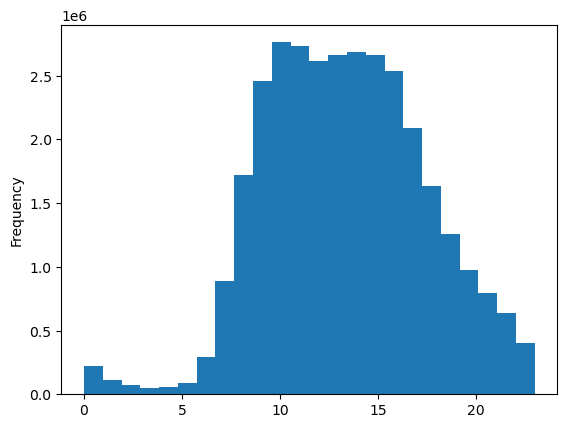

In [8]:
# creating a histogram
ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

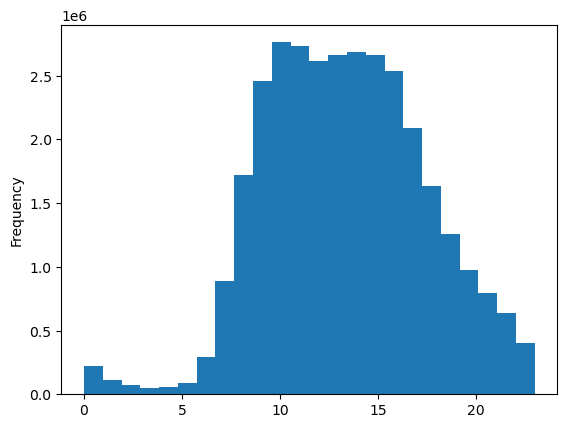

In [35]:
hist = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

In [36]:
# saving a hist as png:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

##### The histogram shows a clear curve in orders over 24 hours. Most orders are placed during daytime. During the night custumors rarely place orders and in the morning the number of orders increases every hour while in the evening they decrease every hour.

##### 4. Create a bar chart from the “loyalty_flag” column.

<Axes: xlabel='loyalty_flag'>

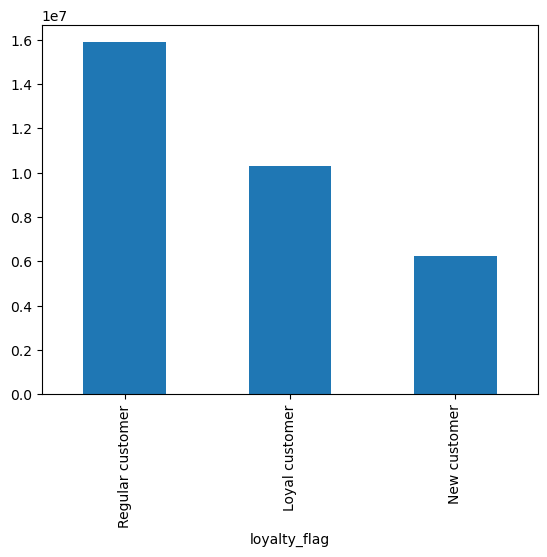

In [9]:
# creating a bar chart for the 'loyalty_flag' column
ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()

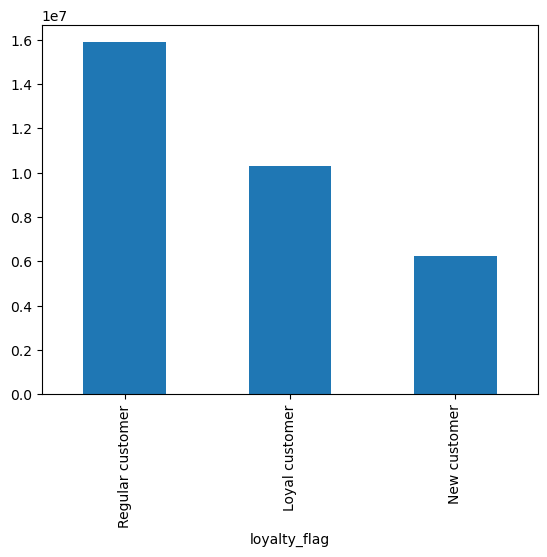

In [33]:
# saving a bar in Jupyters memory:
bar = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()

In [34]:
# saving a bar as png:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

##### You can see that the loyal customers are the middle category when it comes to the total number of customers

In [10]:
ords_prods_cust_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,children,family_status,annual_income,...,price_range_loc,busiest_days,busiest_hours,max_order,loyalty_flag,average_price_product,spending_flag,median_days_between_orders,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


##### 5. Checking the difference in expenditure (the “prices” column) depending on the hour of the day.

In [5]:
# creating a list holding true/false values to the test with np.random.rand:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [6]:
# store 70% of the sample in the dataframe big
big = ords_prods_cust_merge[dev]

In [7]:
# store 30% of the sample in the dataframe small
small = ords_prods_cust_merge[~dev]

In [14]:
# checking the results
len(ords_prods_cust_merge)

32404859

In [15]:
len(big) + len(small)

32404859

In [8]:
# last step before creating the line chart, reducing the sample to the only columns needed
df_2 = small[['order_hour_of_day','prices']]

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\svand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


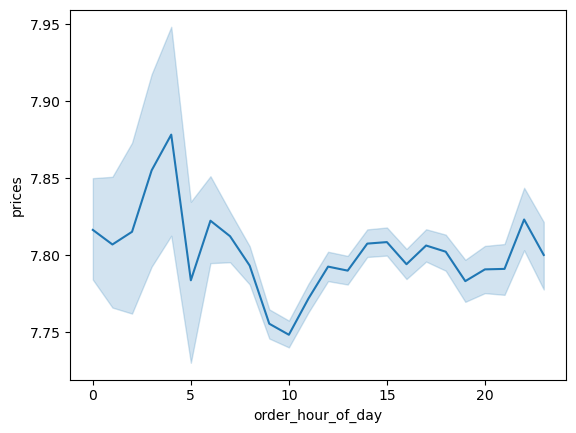

In [12]:
# creating the line plot (line chart)
line_dow_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

##### as opposite to the histogram, the hours where there are less orders placed, the prices of the orders are higher. But overall the prices are really close to each other, between 7,75 and 7,90 dollars

In [13]:
line_dow_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_price.png'))

##### 6. Checking whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [26]:
# reducing the sample to the only columns needed
df_3 = small[['age','children']]

C:\Users\svand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\svand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


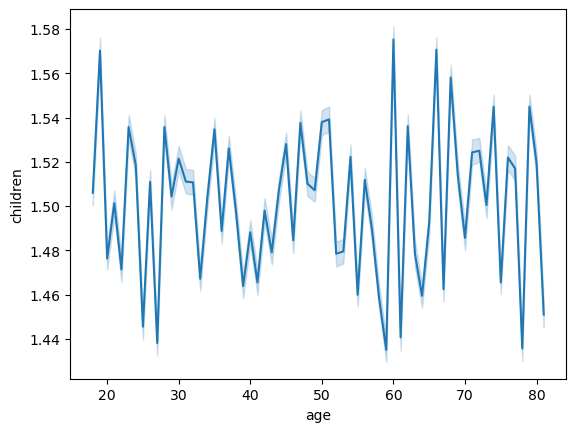

In [40]:
# creating the line plot (line chart)
line_age_children = sns.lineplot(data = df_3, x = 'age',y = 'children')

##### Age does not have a clear effect on the number of children


In [39]:
line_age_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_connection_age_children.png'))

##### 7. Explore whether there’s a connection between age and spending power.

In [28]:
# reducing the sample to the only columns needed
df_4 = small[['age','annual_income']]

<Axes: xlabel='age', ylabel='annual_income'>

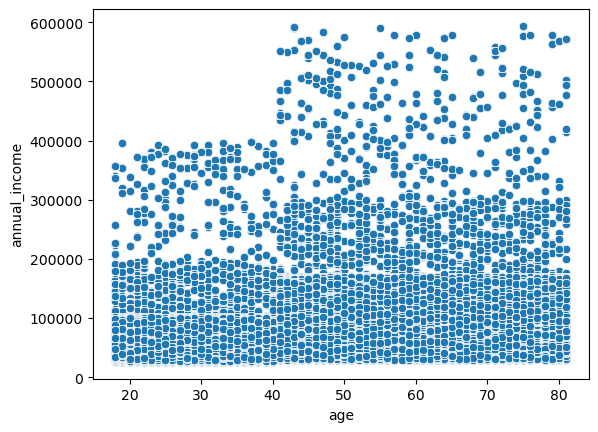

In [30]:
# creating a scatterplot to visualize the connection:
sns.scatterplot(x = 'age', y = 'annual_income',data = df_4)

##### I am not sure if I did this correctly, but based on this scatterplot it shows that until age 40 the maximum annual income lays around 400.000  dollar, with most annual income below 200.000 dollars. Between 40 and 80 years old there are also a lot of customers that have income until around 300.000, and less between 300.000 and 600.000 dollars.

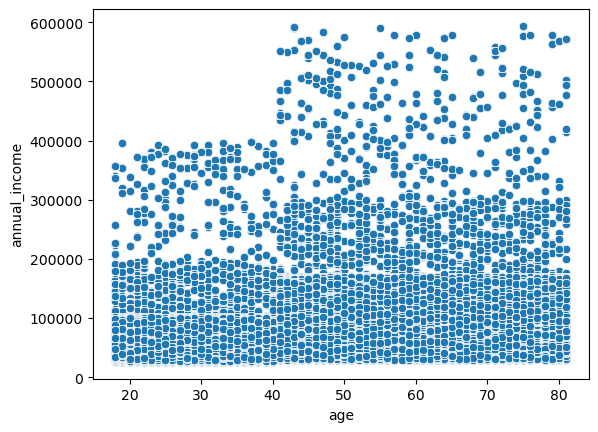

In [42]:
scatterplot = sns.scatterplot(x = 'age', y = 'annual_income',data = df_4)

In [43]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))

In [44]:
# export pickle dataset to 'Prepared Data' folder:
ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customers_orders_products_merged.pkl'))